In [6]:
#Import libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as web
plt.style.use('fivethirtyeight')

/Users/valeriouberti/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [48]:
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC


def get_stock(stock,start,end):
     return web.DataReader(stock,'yahoo',start,end)['Close']
    
    
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    
    for i in range(len(data)):
        if data['SMAROC20'][i] > 0 and data['SMAROC50'][i] > 0 and data['SMAROC100'][i] > 0 and data['SMAROC200'][i] > 0:
            if flag != 1:
                sigPriceBuy.append(data['Close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)

        elif data['SMAROC20'][i] < 0 and data['SMAROC50'][i] < 0 and data['SMAROC100'][i] < 0 and data['SMAROC200'][i] < 0:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)  
    
    return (sigPriceBuy, sigPriceSell)

In [41]:
df = pd.DataFrame(get_stock('KRNT', '1/1/2018', '05/27/2020'))
df['ROC20'] = ROC(df['Close'], 20)
df['SMAROC20'] = df['ROC20'].rolling(window=10).mean()
df['ROC50'] = ROC(df['Close'], 50)
df['SMAROC50'] = df['ROC50'].rolling(window=10).mean()
df['ROC100'] = ROC(df['Close'], 100)
df['SMAROC100'] = df['ROC100'].rolling(window=10).mean()
df['ROC200'] = ROC(df['Close'], 200)
df['SMAROC200'] = df['ROC200'].rolling(window=10).mean()
df.tail()

,Close,ROC20,SMAROC20,ROC50,SMAROC50,ROC100,SMAROC100,ROC200,SMAROC200
Date,,,,,,,,,
2020-05-20,47.740002,66.167777,22.678742,38.457083,-13.309029,40.577158,-1.221034,59.825913,9.203937
2020-05-21,49.330002,70.103455,27.804428,60.474958,-5.444768,44.620349,3.569221,80.762185,16.908444
2020-05-22,50.000000,66.278685,32.339273,60.102468,2.475140,46.070700,8.491701,78.890872,24.230504
2020-05-26,47.060001,53.439848,36.177058,68.492663,11.796370,39.313212,13.127206,71.751832,31.148860
2020-05-27,47.270000,40.392049,38.665133,62.775479,20.705239,39.893457,18.206655,71.578954,38.243359


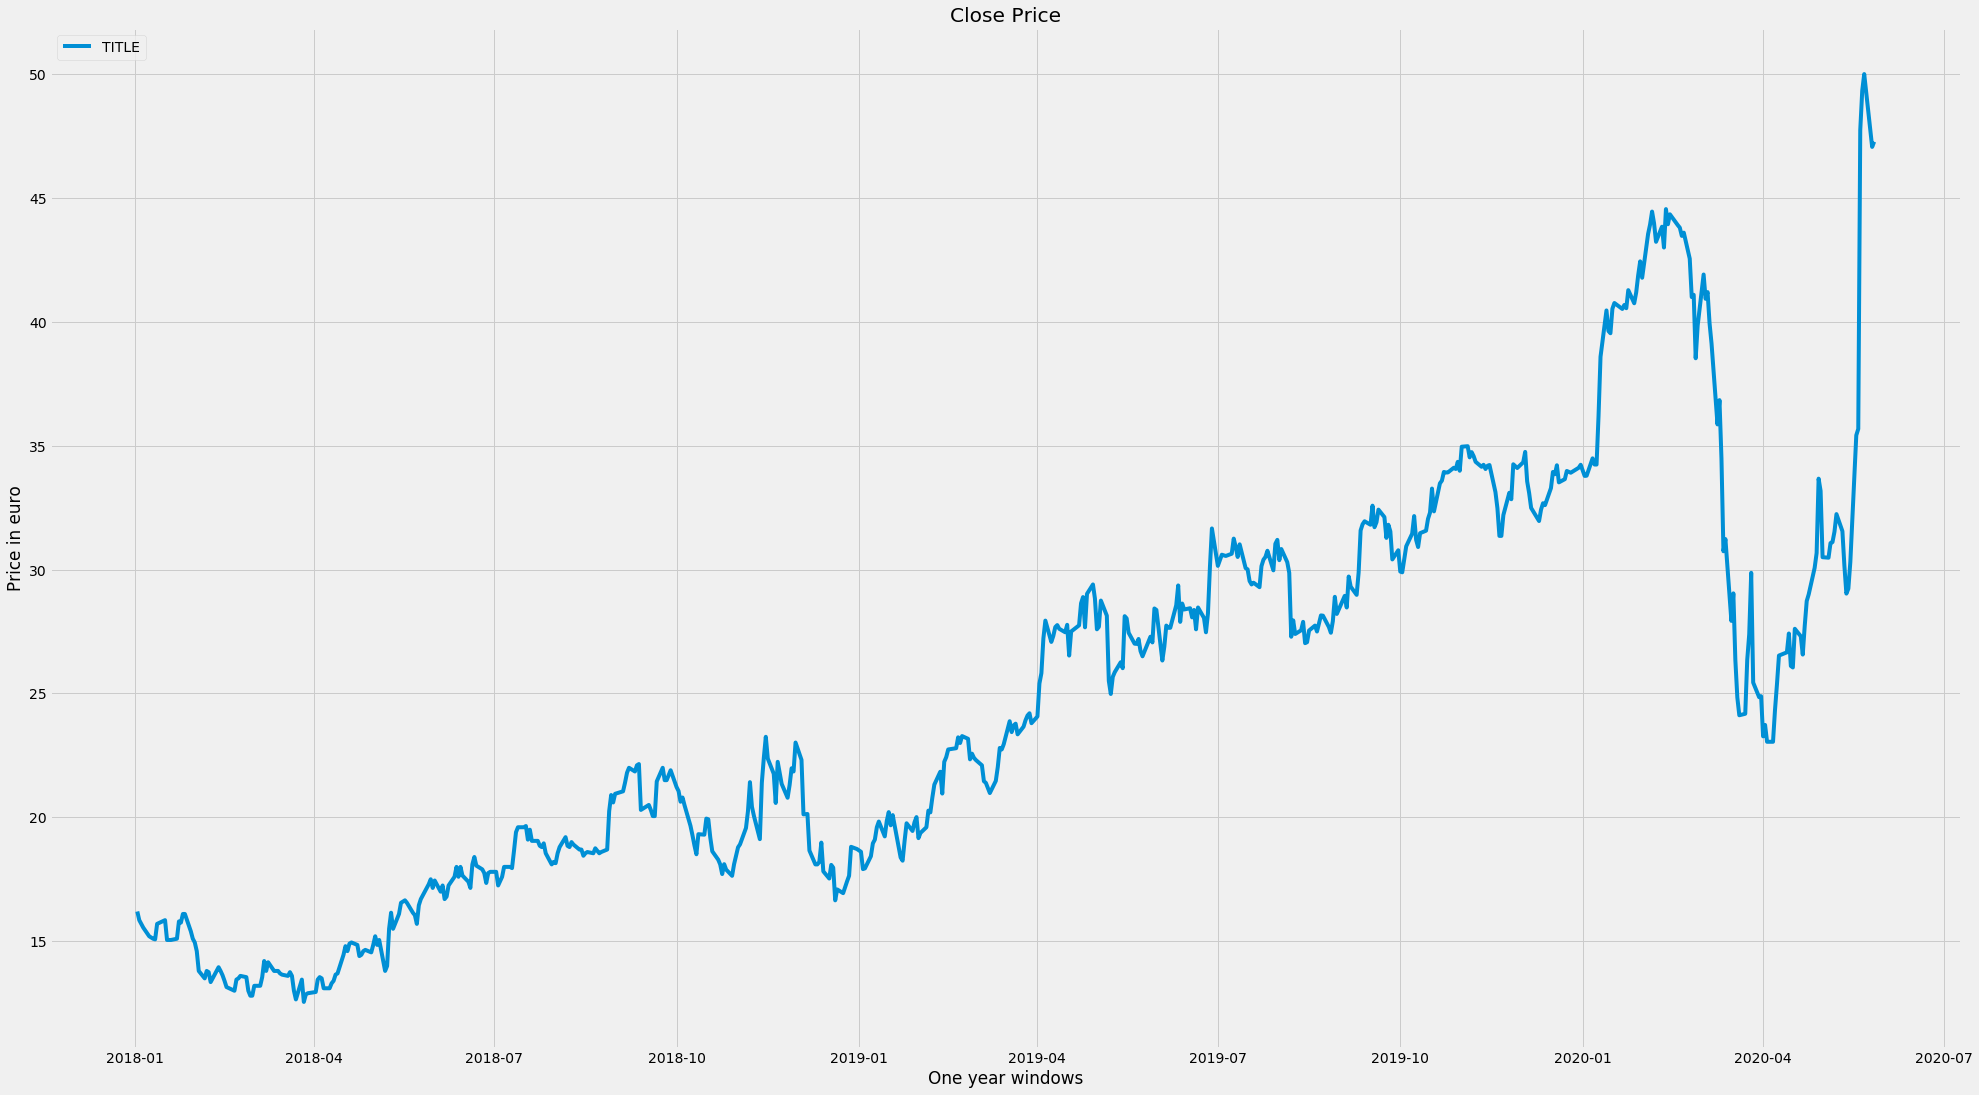

In [42]:
plt.figure(figsize=(30.5,17.5))
plt.plot(df['Close'], label='TITLE')
plt.title('Close Price')
plt.xlabel('One year windows')
plt.ylabel('Price in euro')
plt.legend(loc='upper left')
plt.show()

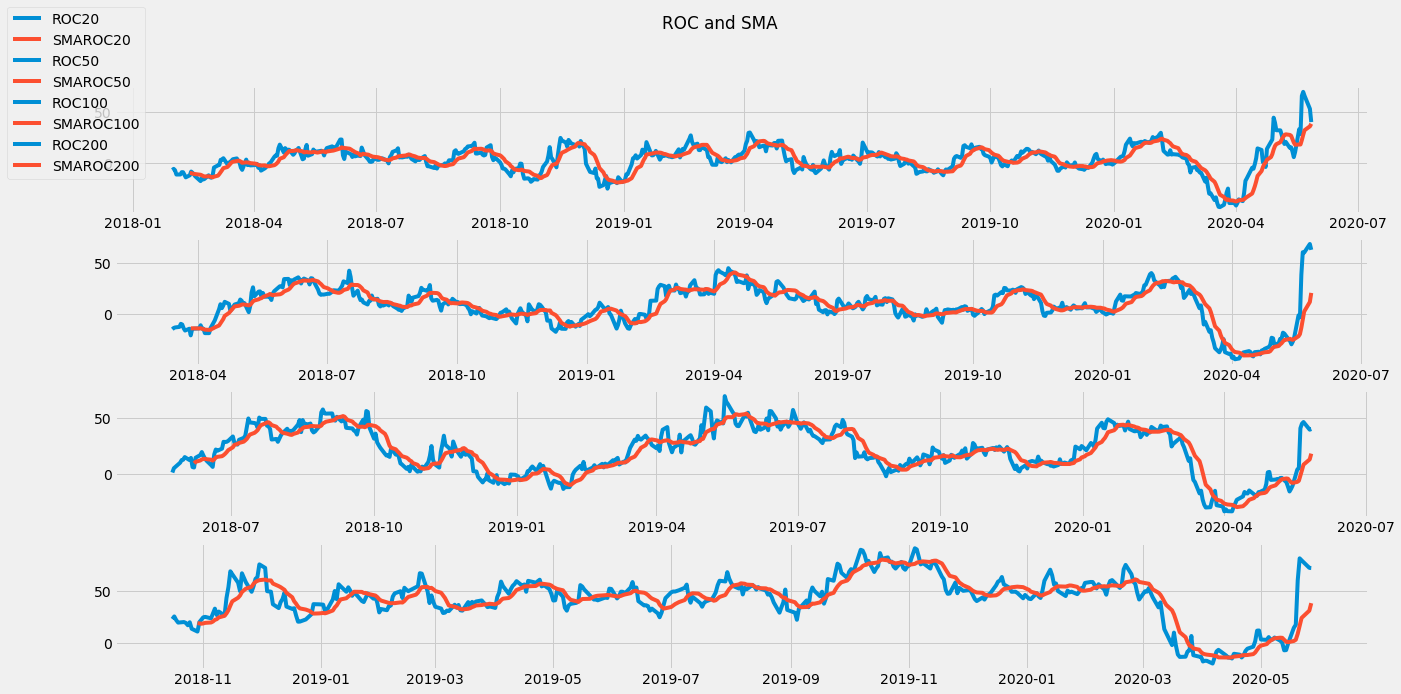

In [43]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4,figsize=(20, 10))
fig.suptitle('ROC and SMA')

ax1.plot(df['ROC20'], label='ROC20')
ax1.plot(df['SMAROC20'], label='SMAROC20')
ax2.plot(df['ROC50'], label='ROC50')
ax2.plot(df['SMAROC50'], label='SMAROC50')
ax3.plot(df['ROC100'], label='ROC100')
ax3.plot(df['SMAROC100'], label='SMAROC100')
ax4.plot(df['ROC200'], label='ROC200')
ax4.plot(df['SMAROC200'], label='SMAROC200')
fig.legend(loc='upper left')

In [45]:
buy_sell = buy_sell(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]

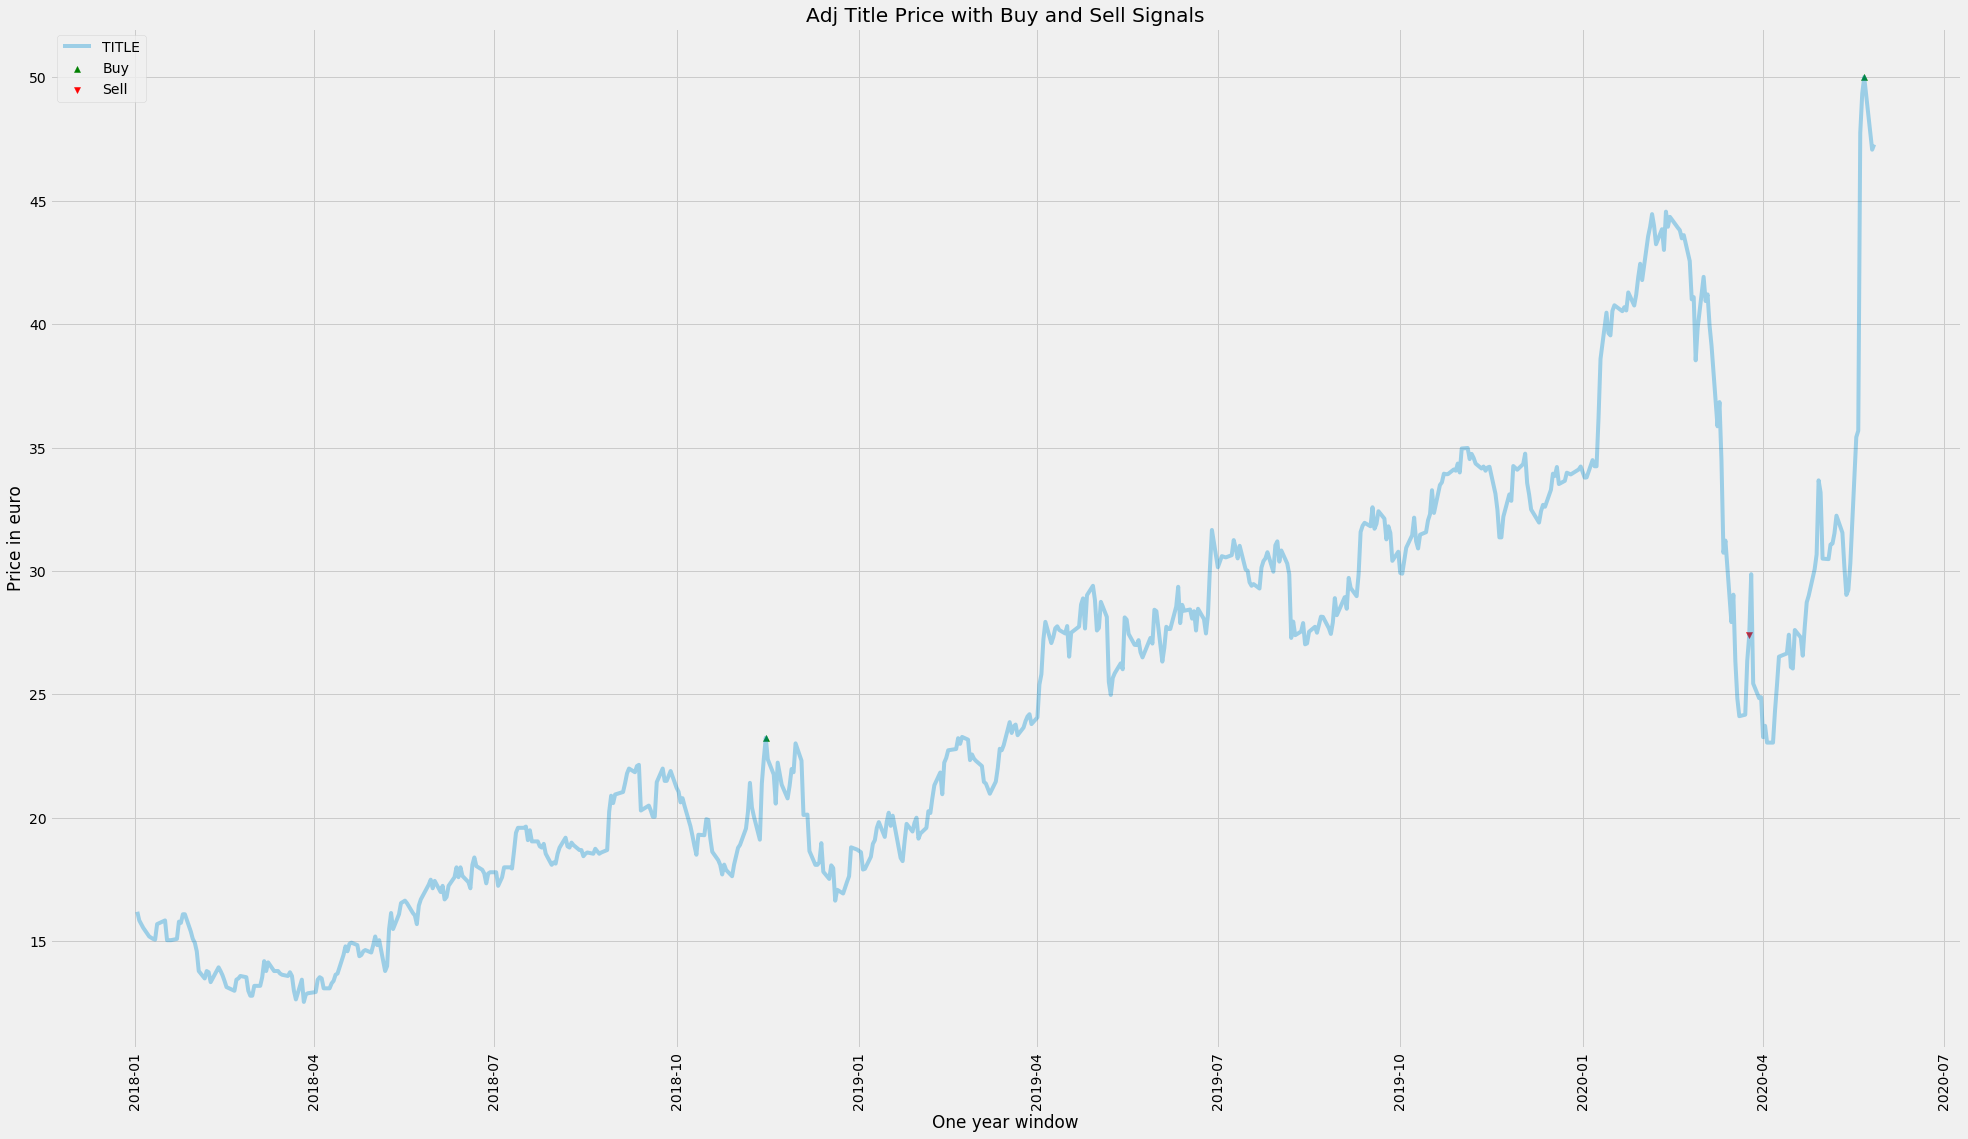

In [47]:
plt.figure(figsize=(30.5,17.5))
plt.plot(df['Close'], label='TITLE', alpha=0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy', marker='^', color= 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell', marker='v', color= 'red')
plt.title('Adj Title Price with Buy and Sell Signals')
plt.xlabel('One year window')
plt.ylabel('Price in euro')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()